<a href="https://colab.research.google.com/github/oguzhanatas/Others/blob/main/task_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# These are the libraries you will need

import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# This is to mount your GDrive. You will need to give permission to the Colab notebook to access your Drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path_of_folder = '/content/drive/My Drive/Colab Notebooks/'

ModuleNotFoundError: No module named 'google'

(7000, 12100)
(7000, 4)
(7000, 110, 110)
(7000,)


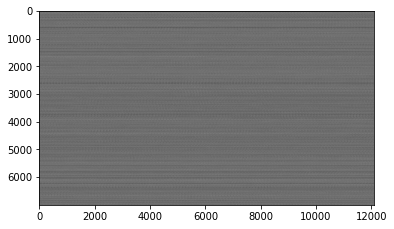

In [ ]:
train = pd.read_csv(path_of_folder+'data/train_images.csv', header=None)
train_lab = pd.read_csv(path_of_folder+'data/train_labels.csv')
test = pd.read_csv(path_of_folder+'data/test_images.csv', header=None)
test_lab = pd.read_csv(path_of_folder+'data/test_labels.csv')
print(train.shape)
print(train_lab.shape)
plt.imshow(train,cmap='gray')
plt.savefig(path_of_folder+'/figures/test_fig_1.png',bbox_inches='tight')

x_train = np.reshape(train.values, (7000, 110, 110))
print(x_train.shape)
y_train = train_lab['Volcano?'].values
print(y_train.shape)
x_test = np.reshape(test.values, (2734, 110, 110))
y_test = test_lab['Volcano?'].values

In [ ]:
print(y_train[0])


1


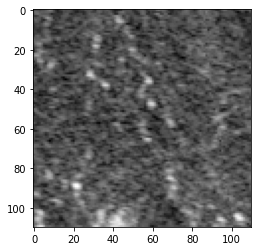

In [ ]:

plt.imshow(x_train[1], cmap='gray')
plt.savefig(path_of_folder+'/figures/test_fig22.png',bbox_inches='tight')

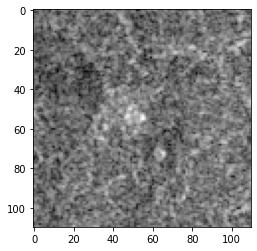

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.savefig(path_of_folder+'/figures/test_fig.png',bbox_inches='tight')

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 110, 110)
(7000,)
(2734, 110, 110)
(2734,)


In [ ]:
# Model / data parameters
num_classes = 2


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (7000, 110, 110, 1)
7000 train samples
2734 test samples


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_test[0],y_train[0])

(7000, 2)
(2734, 2)
[1. 0.] [0. 1.]


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(110 , 110, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same',activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model.summary()
#giving to the model input shpae, convolutional2d func, maxpoll, and the doing flatten (like 1 rows) and running dense layer with sigmoid activation func.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 93314     
Total params: 112,130
Trainable params: 112,130
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#https://keras.io/api/callbacks/early_stopping/
callback = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=50, restore_best_weights=True)

#which will train the model by slicing the data into "batches" of size batch_size and repeatedly iterating over the entire dataset for a given number of epochs
history=model.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1, callbacks=[callback])

Epoch 1/20
63/63 [==============================] - 5s 37ms/step - loss: 0.4159 - accuracy: 0.8587 - val_loss: 0.4290 - val_accuracy: 0.8414
Epoch 2/20
63/63 [==============================] - 2s 35ms/step - loss: 0.3985 - accuracy: 0.8589 - val_loss: 0.4247 - val_accuracy: 0.8414
Epoch 3/20
63/63 [==============================] - 2s 34ms/step - loss: 0.3915 - accuracy: 0.8589 - val_loss: 0.4029 - val_accuracy: 0.8414
Epoch 4/20
63/63 [==============================] - 2s 35ms/step - loss: 0.3499 - accuracy: 0.8611 - val_loss: 0.3117 - val_accuracy: 0.8571
Epoch 5/20
63/63 [==============================] - 2s 34ms/step - loss: 0.2555 - accuracy: 0.9011 - val_loss: 0.2898 - val_accuracy: 0.8843
Epoch 6/20
63/63 [==============================] - 2s 35ms/step - loss: 0.2333 - accuracy: 0.9149 - val_loss: 0.1947 - val_accuracy: 0.9229
Epoch 7/20
63/63 [==============================] - 2s 34ms/step - loss: 0.1895 - accuracy: 0.9322 - val_loss: 0.2025 - val_accuracy: 0.9186
Epoch 8/20
63

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
#print("Test accuracy:", score[1])
print(f"Test accuracy: {round(score[1] * 100, 2)}%")
#regularization--------------

Test loss: 0.17206354439258575
Test accuracy: 94.15%


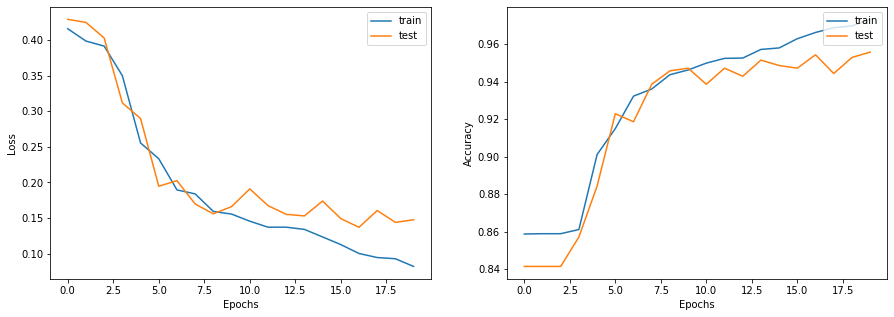

In [ ]:
#print(history.history.keys())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["train", "test"], loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.legend(["train", "test"], loc="upper right")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
plt.savefig(path_of_folder+'figures/fitting_fig.png',bbox_inches='tight')